In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import optimize
H_in_kJmol = 2625.499639

In [9]:
ABF_out = pd.read_csv('ABF_bias_out.txt',sep='\t') # sigma=3.0 Bohr, tau=10000, N_full=100
ABF_out.columns = ['Bin','Xi','Hist','Mean Grad', 'bias', 'dF', 'dF geom']

In [10]:
metaD_out = pd.read_csv('metaD_bias_out.txt',sep='\t') # height=0.1, var=2.0, update_int=20, dT=2000
metaD_out.columns = ['Bin','Xi','Histvim','Mean Grad', 'metaD-bias', 'metaD-force', 'dF', 'dF geom']

In [11]:
eABF_out = pd.read_csv('eABF_bias_out.txt',sep='\t') # sigma=3.0 Bohr, tau=100000, N_full=100
eABF_out.columns = ['Bin','Xi','Hist','Mean Grad', 'Mean Force', 'dF/n', 'dF/n geom', 'dF/CZAR','dF/CZAR geom']

In [12]:
meta_eABF_out = pd.read_csv('meta_eABF_bias_out.txt',sep='\t') # sigma=3.0 Bohr, tau=100000, N_full=100
meta_eABF_out.columns = ['Bin','Xi','Hist','Mean Grad','eABF bias', 'metaD bias', 'dF', 'dF geom','dF/CZAR','dF/CZAR geom']

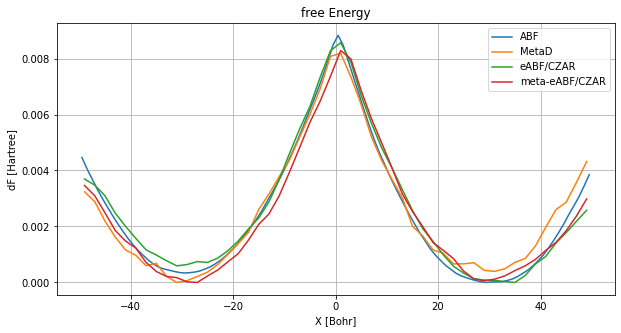

In [13]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(ABF_out['Xi'],ABF_out['dF'],label='ABF')
ax1.plot(metaD_out['Xi'],metaD_out['dF'],label='MetaD')
ax1.plot(eABF_out['Xi'],eABF_out['dF/CZAR'],label='eABF/CZAR')
ax1.plot(meta_eABF_out['Xi'],meta_eABF_out['dF/CZAR'],label='meta-eABF/CZAR')

ax1.set_title('free Energy')
ax1.set_xlabel('X [Bohr]')
ax1.set_ylabel('dF [Hartree]')
ax1.grid()
plt.legend()

In [40]:
ABF2D_out = pd.read_csv('ABF_2D_out.dat',sep='\t') 
ABF2D_out.columns = ['Xi1','Xi2','Hist', 'bias1', 'bias2', 'dF', 'dF geom']

In [41]:
WTM2D_out = pd.read_csv('WTM_2D_out.dat',sep='\t') 
WTM2D_out.columns = ['Xi1','Xi2','Hist', 'bias', 'dF', 'dF geom']

In [42]:
eABF2D_out = pd.read_csv('eABF_2D_out.dat',sep='\t') 
eABF2D_out.columns = ['Xi1','Xi2','Hist', 'bias', 'dF', 'dF geom']

In [43]:
meABF2D_out = pd.read_csv('meta_eABF_2D_out.dat',sep='\t') 
meABF2D_out.columns = ['Xi1','Xi2','Hist', 'bias', 'dF', 'dF geom']

In [44]:
ABF_2D_x = np.unique(ABF2D_out['Xi2'])
ABF_2D_y = np.unique(ABF2D_out['Xi1'])
[ABF_X, ABF_Y] = np.meshgrid(ABF_2D_x, ABF_2D_y)
F_ABF = np.array(ABF2D_out['dF']).reshape(len(ABF_2D_y),len(ABF_2D_x)) *H_in_kJmol

In [45]:
WTM_2D_x = np.unique(WTM2D_out['Xi2'])
WTM_2D_y = np.unique(WTM2D_out['Xi1'])
[WTM_X, WTM_Y] = np.meshgrid(WTM_2D_x, WTM_2D_y)
F_WTM = np.array(WTM2D_out['dF']).reshape(len(WTM_2D_y),len(WTM_2D_x)) *H_in_kJmol

In [46]:
eABF_2D_x = np.unique(eABF2D_out['Xi2'])
eABF_2D_y = np.unique(eABF2D_out['Xi1'])
[eABF_X, eABF_Y] = np.meshgrid(eABF_2D_x, eABF_2D_y)
F_eABF = np.array(eABF2D_out['dF']).reshape(len(eABF_2D_y),len(eABF_2D_x)) *H_in_kJmol

In [47]:
meABF_2D_x = np.unique(meABF2D_out['Xi2'])
meABF_2D_y = np.unique(meABF2D_out['Xi1'])
[meABF_X, meABF_Y] = np.meshgrid(meABF_2D_x, meABF_2D_y)
F_meABF = np.array(eABF2D_out['dF']).reshape(len(meABF_2D_y),len(meABF_2D_x))*H_in_kJmol

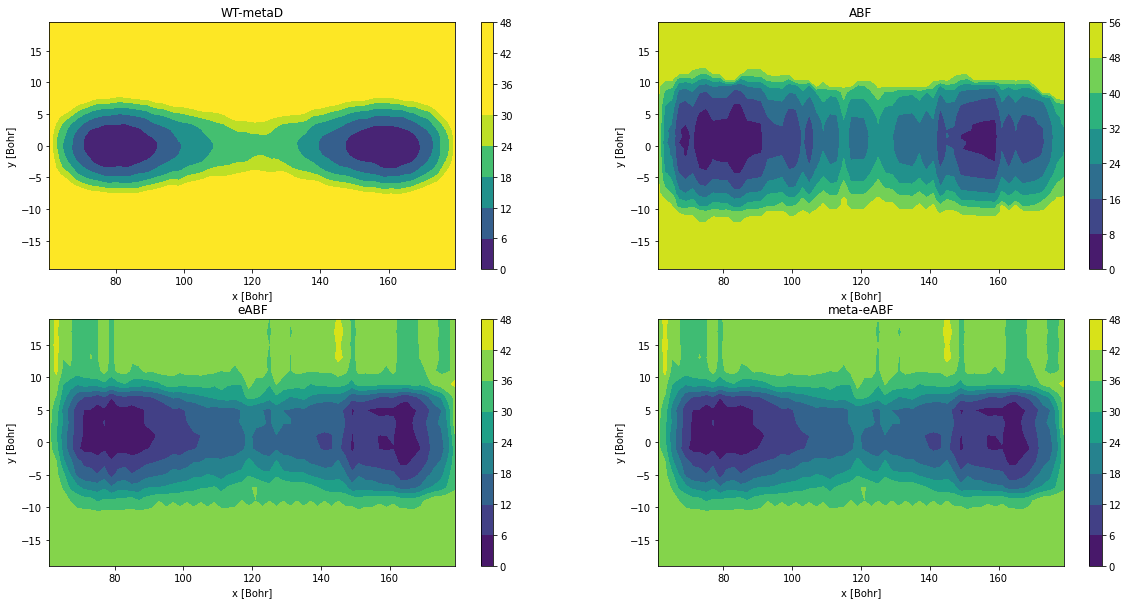

In [48]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20,10))

cs1 = axs[0,0].contourf(WTM_X, WTM_Y, F_WTM, vmin=0, vmax=30)
cs2 = axs[0,1].contourf(ABF_X, ABF_Y, F_ABF)
cs3 = axs[1,0].contourf(eABF_X, eABF_Y, F_eABF)
cs4 = axs[1,1].contourf(meABF_X, meABF_Y, F_meABF)

fig.colorbar(cs1, ax=axs[0,0])
fig.colorbar(cs2, ax=axs[0,1])
fig.colorbar(cs3, ax=axs[1,0])
fig.colorbar(cs4, ax=axs[1,1])

axs[0,0].set_title('WT-metaD')
axs[0,1].set_title('ABF')
axs[1,0].set_title('eABF')
axs[1,1].set_title('meta-eABF')
axs[0,0].set_xlabel('x [Bohr]')
axs[0,0].set_ylabel('y [Bohr]')
axs[0,1].set_xlabel('x [Bohr]')
axs[0,1].set_ylabel('y [Bohr]')
axs[1,0].set_xlabel('x [Bohr]')
axs[1,0].set_ylabel('y [Bohr]')
axs[1,1].set_xlabel('x [Bohr]')
axs[1,1].set_ylabel('y [Bohr]')
fig.savefig('2D_test.png')